'''Questions to answer.
1) is it true that female customers are highly dominant in comparison to male customers?
2) which age category people are more interested in this movie?
3) People from which occupation id are more interested in this movie?
4) which City_Category people are more interested in this movie?
5) How many different products are sold?
6) How many different customer have bought something from the store? 
7) Which category of Stay_In_Current_City_Years people are more interested in Purchase?
'''

In [30]:
#importing the liberary that's are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
#reading the csv file
df=pd.read_csv('blackFriday_train.csv')

In [32]:
#reading the top rows of dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [33]:
#reading the datatypes of different columns
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [34]:
#Looking at the data, we can conclude that our set possesses 12 different columns: 7 numerical (integer and
#float) and 5 object variables. Furthermore, the dataset contains two short type variables: Product_Category_2 and 
#Product_Category_3

In [35]:
#reading the shape of dataset
df.shape

(550068, 12)

In [36]:
#reading the columns names in dataset
df.columns 

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [37]:
#describing the various columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [38]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Q1. is it true that female customers are highly dominant in comparison to male customers?

In [39]:
df['Gender'].value_counts()   #there are more number of Male

M    414259
F    135809
Name: Gender, dtype: int64

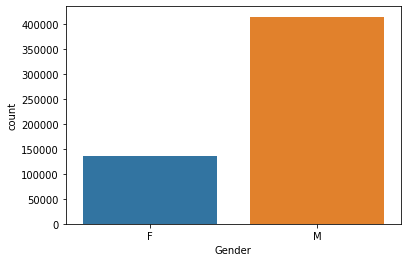

In [40]:
sns.countplot(df['Gender'])

Wow! The graph shows that there are almost 3 times more male customers than female customers!
Why is that? Maybe male visitors are more likely to go out and buy something for their ladies 
when more deals are present.

# Q2.which age category people are more interested in this movie?

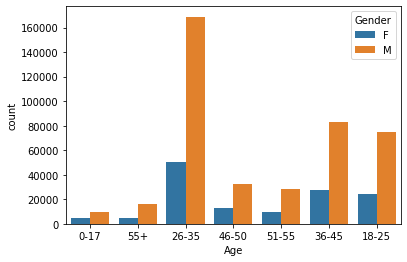

In [41]:
sns.countplot(df['Age'], hue=df['Gender'])

From the figure above, we can easily conclude that the highest number of customers belong to the age group between 26 and 35, for both genders. Younger and older population are far less represented on Black Friday. Based on these results, the retail store should sell most of the products that target people in their late twenties to early thirties. To increase profits, the number of products targeting people around their thirties can be increased while the number of products that target the older or younger population can be reduced.

In [42]:
df['Age'].value_counts() # Here most people are from category 26-35

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

# Q3.People from which occupation id are more interested in this movie?

In [43]:
df['Occupation'].nunique() # there are 20 different occupation are there and one for no occupation.

21

Now let's explore the Occupation category. The Occupation number is the ID number of occupation type of each customer. We can see that around 20 different occupations exist(one is for no occupation). But let's perform exact analysis.
The Occupation number could represent different professions of customers: for example, number 1 could be an engineer, number 2 - a doctor, number 3 an artist, etc.

In [44]:
print(np.unique(np.array(df['Occupation'])))# these are the different Occupations id

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [45]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(df[df['Occupation'] == oid]['Purchase'].sum())

spent_money # This is list of purchase of different occupation ids

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617,
 296570442]

In [46]:
spent_money.index(max(spent_money))

4

Occupation 4 category people spend more money or have more purchase.

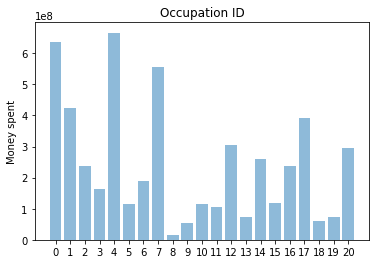

In [47]:
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', 
           '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

Same thing can be viewed by graph. Occupation Id 4 has spend maximum money.
Occupation id 8 has spend minimum money.

# Q4.which City_Category people are more interested in this movie?

In [48]:
df['City_Category'].value_counts() 

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

We see here there are more people from City_Category B.Now, it will be interesting to see in percentages, what is the ratio of customers from each city. This information will be presented in the form of a colored pie chart.

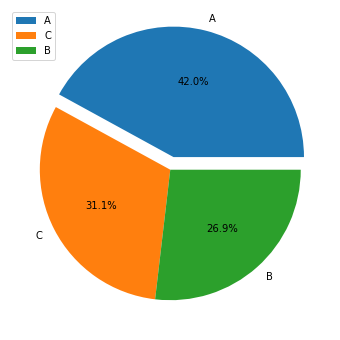

In [49]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(df['City_Category'].value_counts(), explode=explode, labels=df['City_Category'].unique(),
        autopct='%1.1f%%')
plt.legend()
plt.show()

It is evident from the pie chart that all the three cities are almost equally represented in the retail store during Black Fridays. Maybe the store is somewhere between these three cities, is easily accessible and has good road connections from these cities

# Q5.How many different products are sold?

In [50]:
df['Product_ID'].nunique()

3631

There are 3,631 different products are sold.

# Q6.How many different customer have bought something from the store? 

In [51]:
df['User_ID'].nunique()

5891

During Black Friday, 5,891 different customers have bought something from the store.

# Q7.Which category of Stay_In_Current_City_Years people are more interested in Purchase?

In [52]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

The Customer which are new to city or spend 1 or 2 year in the city are most likey to purchase.

In [53]:
df['Marital_Status'].nunique() # there are two type of martial_status 
                                # married or single 

2

In [54]:
df['Product_Category_1'].nunique()

20

# Data Transformation


We have covered until now a few basic techniques for analyzing raw data. Before we can apply machine learning algorithms to our dataset, we need to convert it into a certain form that machine learning algorithms can operate on. The task of the learning algorithms will be to predict the value of the Purchase variable, given customer information as input.

In [55]:
df.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)

We have to drop the Column Product_Category_2 and Product_Category_3 because these contain more than 25% data empty.

In [56]:
df.drop(['Product_ID','User_ID'],inplace=True, axis=1)

There is no need of these columns in prediction of Purchase.

In [57]:
df.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

Our final selection is based on 8 columns - one variable we want to predict (the Purchase column) and 7 variables which we will use for training our machine learning model.

As we can see from the dtypes table, we are dealing with 4 categorical columns. However, basic machine learning models are capable of processing numerical values. Therefore, we need to convert the categorical columns to numeric ones.

In [58]:
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

data_final = pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,F,M,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,8370,1,0,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,15200,1,0,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,1422,1,0,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,1057,1,0,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,7969,0,1,...,0,1,0,0,1,0,0,0,0,1
